  cardholder_id       department  avg_transaction_amount  \
0     CARD_0001  Field Marketing                  730.47   
1     CARD_0002  Field Marketing                  596.00   
2     CARD_0003  Field Marketing                  775.05   
3     CARD_0004  Public Outreach                  794.06   
4     CARD_0005  Public Outreach                  504.90   

   transactions_per_month  pct_weekend_transactions  
0                     6.0                      0.33  
1                     8.0                      0.37  
2                     5.0                      0.43  
3                     6.0                      0.31  
4                     1.0                      0.40  
       avg_transaction_amount  transactions_per_month  \
count              725.000000              725.000000   
mean               292.949972               20.437241   
std                324.409462               10.760989   
min                 10.000000                1.000000   
25%                 83.480000 

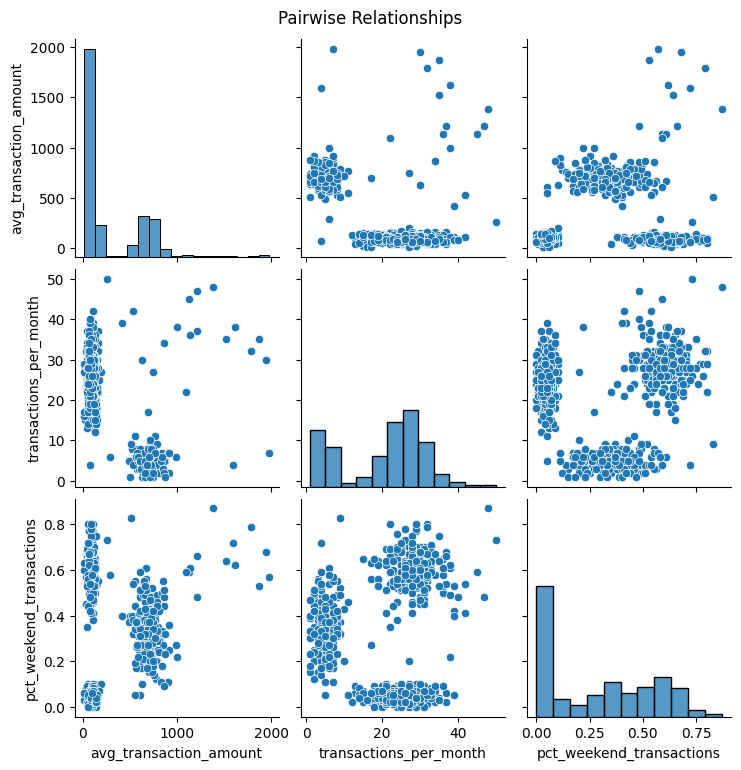

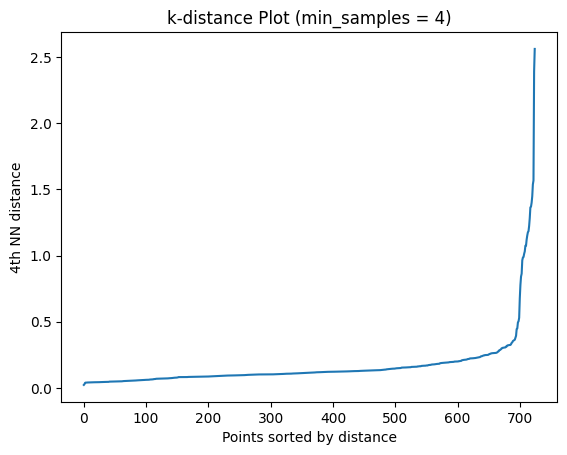

cluster_label
 1    300
 0    203
 2    200
-1     14
 4      4
 3      4
Name: count, dtype: int64
               avg_transaction_amount  transactions_per_month  \
cluster_label                                                   
-1                            1185.52                   28.21   
 0                             694.23                    5.17   
 1                              99.13                   25.00   
 2                              85.96                   27.88   
 3                            1172.60                   41.25   
 4                             810.82                   32.25   

               pct_weekend_transactions  
cluster_label                            
-1                                 0.65  
 0                                 0.34  
 1                                 0.05  
 2                                 0.60  
 3                                 0.58  
 4                                 0.15  


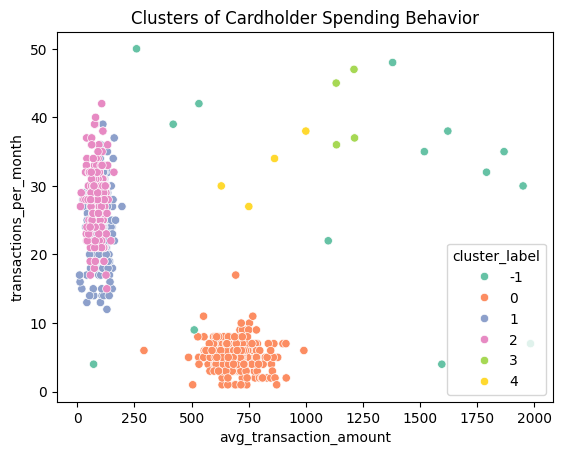

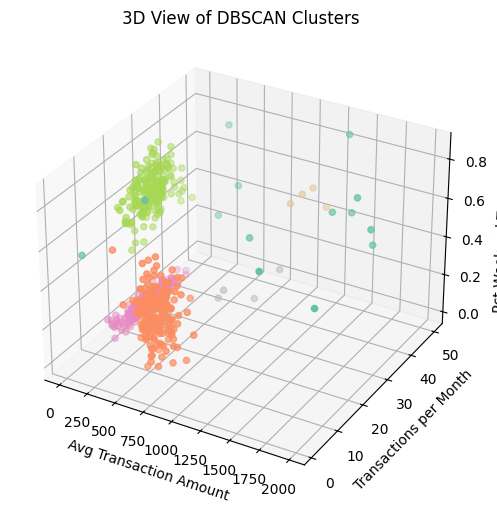

Number of outliers detected: 14
    cardholder_id       department  avg_transaction_amount  \
701     CARD_0702  Field Marketing                   71.32   
703     CARD_0704  Field Marketing                 1982.93   
705     CARD_0706  Field Marketing                  419.51   
709     CARD_0710   Administration                 1594.93   
710     CARD_0711      Parks & Rec                 1518.49   
711     CARD_0712   Administration                 1790.46   
712     CARD_0713  Field Marketing                 1621.26   
713     CARD_0714  Field Marketing                  532.17   
717     CARD_0718      Parks & Rec                 1867.29   
718     CARD_0719   Administration                 1379.70   
719     CARD_0720      Parks & Rec                 1950.45   
721     CARD_0722      Parks & Rec                 1098.00   
723     CARD_0724  Field Marketing                  259.21   
724     CARD_0725   Administration                  511.57   

     transactions_per_month  pct_week

In [7]:
# ======================================
# Instructor Solution – DBSCAN Assignment
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load dataset
df = pd.read_csv("DC_PCard_Summary_G.csv")

# --- 1. Explore ---
print(df.head())
print(df.describe())

sns.pairplot(df, vars=["avg_transaction_amount", "transactions_per_month", "pct_weekend_transactions"])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# --- 2. Prepare data ---
features = df[["avg_transaction_amount", "transactions_per_month", "pct_weekend_transactions"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# --- 3. k-distance plot to find eps ---
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 3])  # 4th nearest neighbor distance
plt.plot(distances)
plt.title("k-distance Plot (min_samples = 4)")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th NN distance")
plt.show()

# --- 4. DBSCAN clustering ---
# Based on the elbow in k-distance plot, instructor can set eps ≈ 0.8–1.0
db = DBSCAN(eps=0.9, min_samples=4)
labels = db.fit_predict(X_scaled)
df["cluster_label"] = labels

# --- 5. Analyze results ---
print(df["cluster_label"].value_counts())

# Cluster summary
cluster_summary = (
    df.groupby("cluster_label")[["avg_transaction_amount", "transactions_per_month", "pct_weekend_transactions"]]
    .mean()
    .round(2)
)
print(cluster_summary)

# --- 6. Visualize clusters ---
sns.scatterplot(
    data=df,
    x="avg_transaction_amount",
    y="transactions_per_month",
    hue="cluster_label",
    palette="Set2"
)
plt.title("Clusters of Cardholder Spending Behavior")
plt.show()

# 3D visualization (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    df["avg_transaction_amount"], 
    df["transactions_per_month"], 
    df["pct_weekend_transactions"], 
    c=df["cluster_label"], cmap="Set2"
)
ax.set_xlabel("Avg Transaction Amount")
ax.set_ylabel("Transactions per Month")
ax.set_zlabel("Pct Weekend Transactions")
plt.title("3D View of DBSCAN Clusters")
plt.show()

# --- 7. Interpret ---
noise = df[df["cluster_label"] == -1]
print(f"Number of outliers detected: {len(noise)}")
print(noise[["cardholder_id", "department", "avg_transaction_amount", "transactions_per_month", "pct_weekend_transactions"]])